# Block 0 – Data Loading & Preprocessing
This section loads the raw NYC 311 data, filters noise-related complaints from the last 12 months, 
and extracts essential temporal and categorical features needed for analysis and modeling.

Steps:
1. Load raw CSV  
2. Convert datetime fields  
3. Filter last 12 months  
4. Keep only noise-related complaints  
5. Create time features (month, hour, dayofweek, weekend)  

In [1]:
# ============================
# Block 0 — Data Loading & Preprocessing
# ============================

import pandas as pd
import numpy as np

csv_path = "../data/311_Service_Requests_from_2024_to_Present_20251123.csv"

df = pd.read_csv(csv_path, low_memory=False)
df.head()


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,66914322,11/22/2025 02:06:25 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11378,53-56 65 PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.729767,-73.900223,"(40.72976672912934, -73.9002226044247)"
1,66915771,11/22/2025 02:06:25 AM,NaN,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint - Non Passenger,Street,11430,JOHN F KENNEDY AIRPORT,...,NaN,NaN,"JOHN F KENNEDY AIRPORT, QUEENS (JAMAICA) ,NY, ...",NaN,NaN,NaN,NaN,40.648320,-73.788281,"(40.64832048620134, -73.78828125130184)"
2,66911489,11/22/2025 02:05:59 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10451,801 GERARD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.825479,-73.926138,"(40.82547878415982, -73.92613787827133)"
3,66908585,11/22/2025 02:05:13 AM,NaN,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,10036,159 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.759328,-73.982937,"(40.75932847816629, -73.9829371166897)"
4,66908621,11/22/2025 02:04:27 AM,NaN,NYPD,New York City Police Department,Urinating in Public,NaN,Club/Bar/Restaurant,11236,633 REMSEN AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.651574,-73.918589,"(40.65157443203026, -73.9185893715624)"


In [2]:
df["Created Date"] = pd.to_datetime(df["Created Date"], errors="coerce")
df["Closed Date"] = pd.to_datetime(df["Closed Date"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513950 entries, 0 to 3513949
Data columns (total 41 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   Unique Key                      int64         
 1   Created Date                    datetime64[ns]
 2   Closed Date                     datetime64[ns]
 3   Agency                          object        
 4   Agency Name                     object        
 5   Complaint Type                  object        
 6   Descriptor                      object        
 7   Location Type                   object        
 8   Incident Zip                    object        
 9   Incident Address                object        
 10  Street Name                     object        
 11  Cross Street 1                  object        
 12  Cross Street 2                  object        
 13  Intersection Street 1           object        
 14  Intersection Street 2           object        
 15

In [3]:
# 2. Define the start date of the most recent year
end_date = df["Created Date"].max()
start_date = end_date - pd.DateOffset(years=1)

# 3. Filter recent year
mask_recent = (df["Created Date"] >= start_date)

# 4. 过滤噪音投诉
mask_noise = df["Complaint Type"].str.contains("Noise", case=False, na=False)

# 5. Generate final noise_df
noise_df = df[mask_recent & mask_noise].copy()

len(noise_df)

814100

In [4]:
# Make sure Created Date is datetime (you've done this before, but it doesn't hurt to write it again here).
#noise_df["Created Date"] = pd.to_datetime(noise_df["Created Date"], errors="coerce")

# Temporal features
noise_df["year"] = noise_df["Created Date"].dt.year
noise_df["month"] = noise_df["Created Date"].dt.month
noise_df["dayofweek"] = noise_df["Created Date"].dt.dayofweek  # Monday=0
noise_df["hour"] = noise_df["Created Date"].dt.hour

# Is it the weekend?
noise_df["is_weekend"] = noise_df["dayofweek"].isin([5, 6])

noise_df[["Created Date", "Complaint Type", "Borough", "year", "month", "dayofweek", "hour"]].head()

,Created Date,Complaint Type,Borough,year,month,dayofweek,hour
2,2025-11-22 02:05:59,Noise - Street/Sidewalk,BRONX,2025,11,5,2
5,2025-11-22 02:04:23,Noise - Residential,MANHATTAN,2025,11,5,2
6,2025-11-22 02:04:17,Noise - Commercial,BROOKLYN,2025,11,5,2
7,2025-11-22 02:03:38,Noise - Residential,BRONX,2025,11,5,2
8,2025-11-22 02:01:41,Noise - Commercial,BROOKLYN,2025,11,5,2


In [5]:
noise_df.shape, noise_df[["Created Date", "Complaint Type", "Descriptor", "Borough", "Agency"]].head()

((814100, 46),
          Created Date           Complaint Type        Descriptor    Borough  \
 2 2025-11-22 02:05:59  Noise - Street/Sidewalk      Loud Talking      BRONX   
 5 2025-11-22 02:04:23      Noise - Residential  Loud Music/Party  MANHATTAN   
 6 2025-11-22 02:04:17       Noise - Commercial  Loud Music/Party   BROOKLYN   
 7 2025-11-22 02:03:38      Noise - Residential  Loud Music/Party      BRONX   
 8 2025-11-22 02:01:41       Noise - Commercial      Loud Talking   BROOKLYN   
 
   Agency  
 2   NYPD  
 5   NYPD  
 6   NYPD  
 7   NYPD  
 8   NYPD  )

In [6]:
noise_df[["dayofweek", "hour", "is_weekend"]].head(10)

,dayofweek,hour,is_weekend
2,5,2,True
5,5,2,True
6,5,2,True
7,5,2,True
8,5,2,True
9,5,2,True
10,5,2,True
11,5,2,True
12,5,2,True
14,5,2,True


# **Block 1 — Urban Noise Patterns**
This section provides city-level descriptive analytics, examining:
- Monthly noise complaint trends  
- Borough-level distribution  
- Temporal patterns (hour × weekday heatmap)  
- Complaint Type and Descriptor distributions  
- Noise Type × Time structure (hour, weekday, top complaint types)

These analyses answer *RQ1: What spatial and temporal patterns characterize NYC noise complaints?*


C:\Users\asus\AppData\Local\Temp\ipykernel_21164\3427675622.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M")


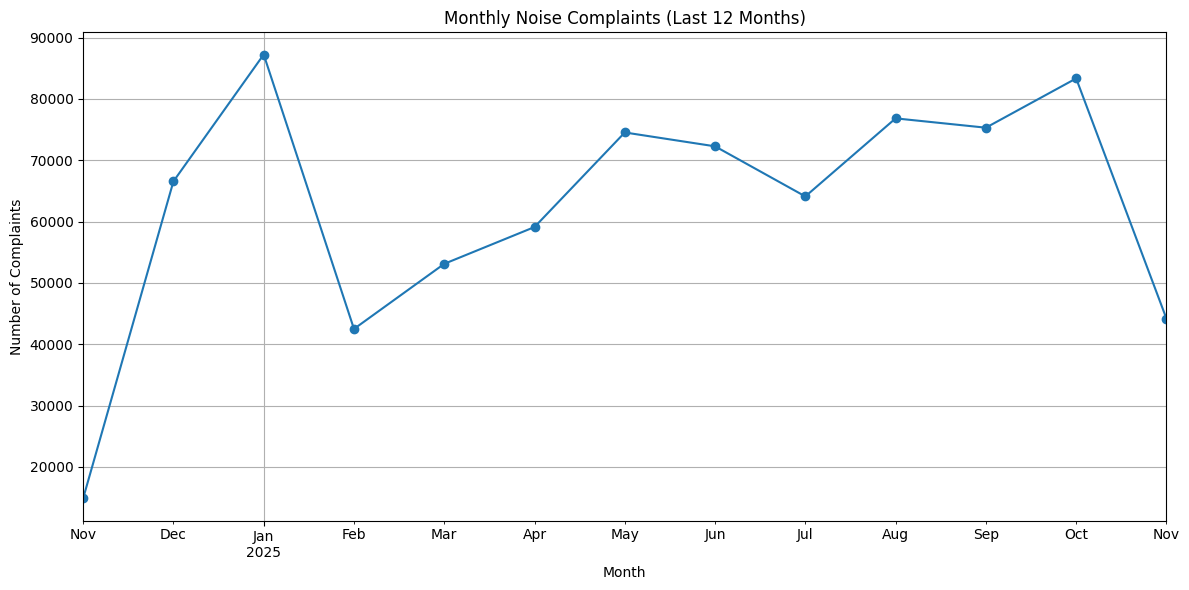

In [59]:
#Monthly quantity trend (resampled monthly)
import matplotlib.pyplot as plt

# Count the number of noises on a monthly basis
monthly_counts = (
    noise_df
    .set_index("Created Date")
    .resample("M")
    .size()
)

plt.figure(figsize=(12, 6))
monthly_counts.plot(marker='o')
plt.title("Monthly Noise Complaints (Last 12 Months)")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/figure01_monthly.png", dpi=300, bbox_inches="tight")
plt.show()

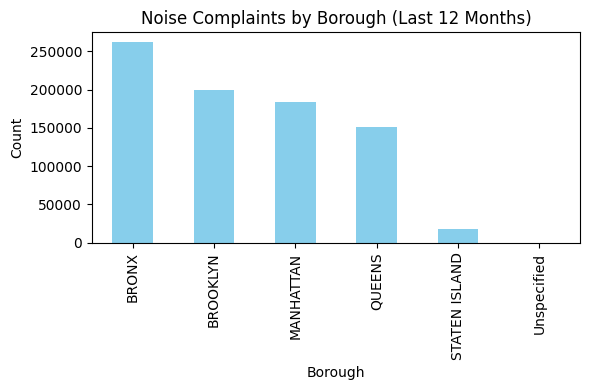

In [60]:
#Borough Noise Complaint Counts Bar Chart
borough_counts = noise_df["Borough"].value_counts()

plt.figure(figsize=(6, 4))
borough_counts.plot(kind="bar", color='skyblue')
plt.title("Noise Complaints by Borough (Last 12 Months)")
plt.xlabel("Borough")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../figures/figure02.png", dpi=300, bbox_inches="tight")
plt.show()

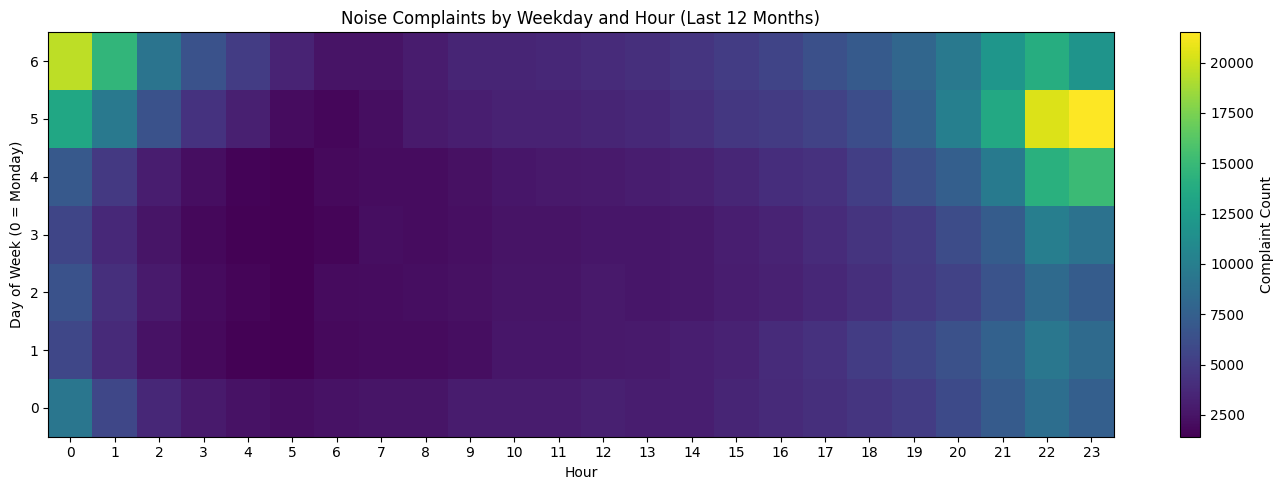

In [61]:
#dayofweek × hour Heatmap
import numpy as np

pivot = noise_df.pivot_table(
    index="dayofweek",
    columns="hour",
    values="Complaint Type",
    aggfunc="count",
    fill_value=0
)

plt.figure(figsize=(14, 5))
plt.imshow(pivot, aspect="auto", cmap="viridis", origin="lower")
plt.title("Noise Complaints by Weekday and Hour (Last 12 Months)")
plt.colorbar(label="Complaint Count")
plt.xlabel("Hour")
plt.ylabel("Day of Week (0 = Monday)")
plt.xticks(range(0, 24))
plt.yticks(range(0, 7))
plt.tight_layout()
plt.savefig("../figures/figure03.png", dpi=300, bbox_inches="tight")
plt.show()

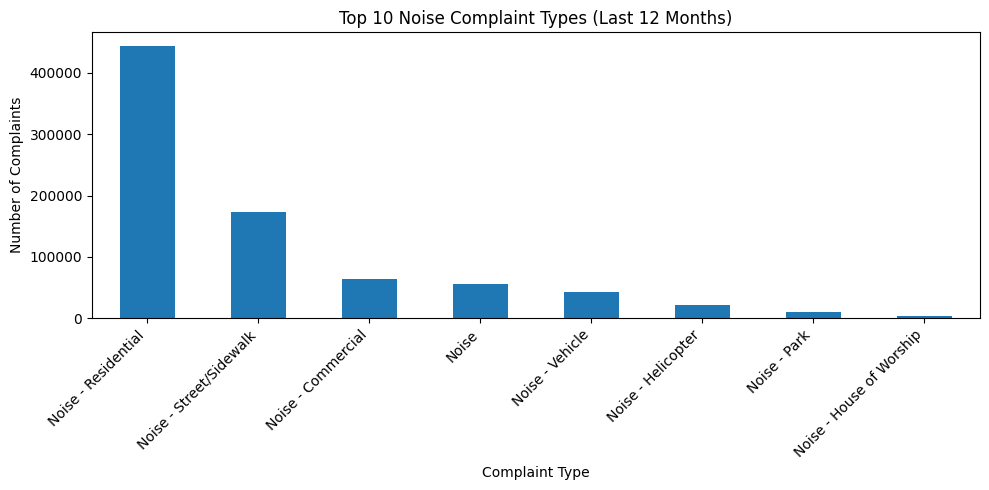

In [10]:
#  Overall distribution of Complaint Type (Top 10)

top_n = 10

complaint_counts = noise_df["Complaint Type"].value_counts().head(top_n)
complaint_counts

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
complaint_counts.plot(kind="bar")
plt.title(f"Top {top_n} Noise Complaint Types (Last 12 Months)")
plt.xlabel("Complaint Type")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [11]:
# Share of each Complaint Type among all noise complaints (Top 10)

complaint_share = (complaint_counts / len(noise_df)).round(4) * 100
complaint_share = complaint_share.to_frame(name="percentage")
complaint_share

,percentage
Complaint Type,
Noise - Residential,54.54
Noise - Street/Sidewalk,21.23
Noise - Commercial,7.94
Noise,6.82
Noise - Vehicle,5.18
Noise - Helicopter,2.72
Noise - Park,1.21
Noise - House of Worship,0.35


In [12]:
#  Descriptor distribution (Top 15)

top_k = 15

descriptor_counts = noise_df["Descriptor"].value_counts().head(top_k)
descriptor_counts

Descriptor
Loud Music/Party                                    477478
Banging/Pounding                                    131741
Loud Talking                                         77514
Car/Truck Music                                      23068
Other                                                21641
Noise: Construction Before/After Hours (NM1)         21138
Engine Idling                                        10253
Car/Truck Horn                                       10237
Noise, Barking Dog (NR5)                              8254
Noise: Construction Equipment (NC1)                   7355
Noise: Alarms (NR3)                                   6882
Loud Television                                       6104
Noise: air condition/ventilation equipment (NV1)      4356
Noise: Jack Hammering (NC2)                           2477
Noise:  lawn care equipment (NCL)                     1319
Name: count, dtype: int64

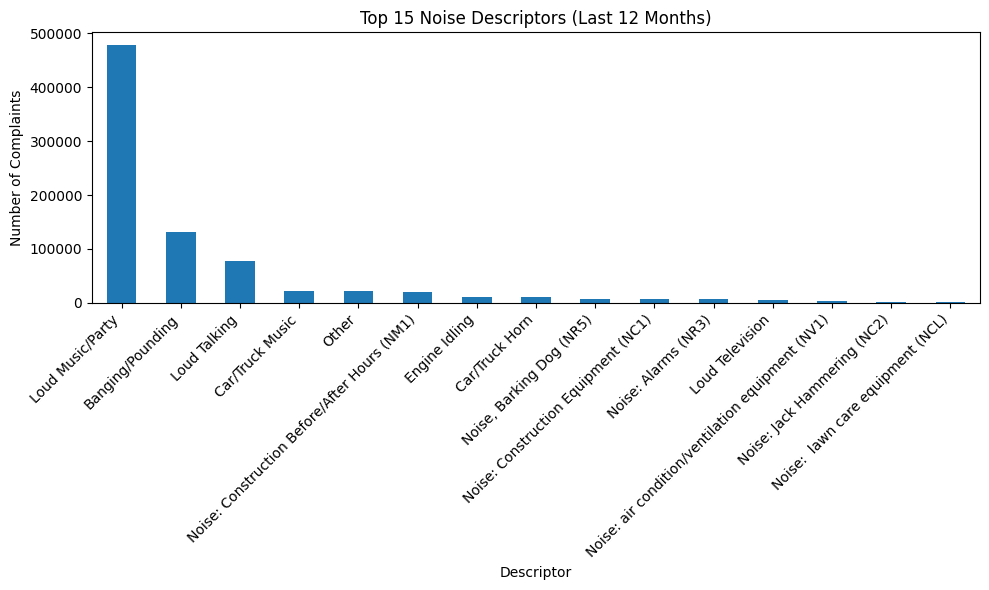

In [13]:
plt.figure(figsize=(10, 6))
descriptor_counts.plot(kind="bar")
plt.title(f"Top {top_k} Noise Descriptors (Last 12 Months)")
plt.xlabel("Descriptor")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [14]:
#  Borough × Complaint Type (Top 5 Types)


top_types = noise_df["Complaint Type"].value_counts().head(5).index


subset = noise_df[noise_df["Complaint Type"].isin(top_types)].copy()


borough_type_ct = pd.crosstab(subset["Borough"], subset["Complaint Type"])

borough_type_ct

Complaint Type,Noise,Noise - Commercial,Noise - Residential,Noise - Street/Sidewalk,Noise - Vehicle
Borough,,,,,
BRONX,5459,7003,192472,46805,8259
BROOKLYN,15855,21731,102576,40732,11676
MANHATTAN,21157,21280,65257,52631,9531
QUEENS,10944,13305,73473,30498,11555
STATEN ISLAND,2103,1305,10181,2190,1140
Unspecified,1,2,24,13,2


<Figure size 1000x600 with 0 Axes>

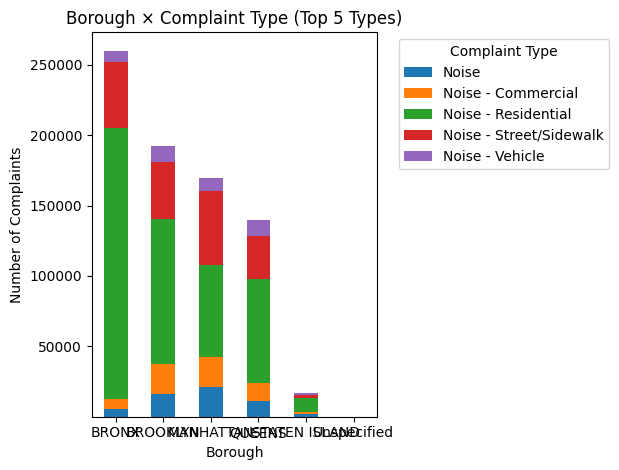

In [15]:
plt.figure(figsize=(10, 6))
borough_type_ct.plot(kind="bar", stacked=True)
plt.title("Borough × Complaint Type (Top 5 Types)")
plt.xlabel("Borough")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=0)
plt.legend(title="Complaint Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [16]:
# Noise Type × Time Structure

# Get Top 5 complaint types
top_types = noise_df["Complaint Type"].value_counts().head(5).index
top_types

Index(['Noise - Residential', 'Noise - Street/Sidewalk', 'Noise - Commercial',
       'Noise', 'Noise - Vehicle'],
      dtype='object', name='Complaint Type')

In [17]:
# Filter only top types
subset = noise_df[noise_df["Complaint Type"].isin(top_types)].copy()

# Build pivot table
pivot_hour_type = subset.pivot_table(
    index="Complaint Type",
    columns="hour",
    values="Created Date",
    aggfunc="count",
    fill_value=0
)

pivot_hour_type

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Noise,2512,1800,1045,723,631,835,1841,2776,3494,3792,...,2178,2107,1889,1739,2275,2337,2489,2979,3937,3212
Noise - Commercial,8101,5456,3246,1969,1092,537,520,607,486,590,...,912,1162,1399,1641,1997,2742,3871,5691,9694,9870
Noise - Residential,35897,25692,17296,13202,10398,9029,8913,8788,9230,10266,...,13322,14546,15767,17255,19710,22632,26708,32130,43248,42521
Noise - Street/Sidewalk,16532,10861,6798,4474,3435,2059,1672,1700,1759,1904,...,3913,4608,5405,6582,7760,9796,12767,17565,22352,19694
Noise - Vehicle,2999,2009,1362,1030,1004,737,867,846,973,991,...,1223,1464,1730,1962,2225,2567,2825,3344,3933,3889


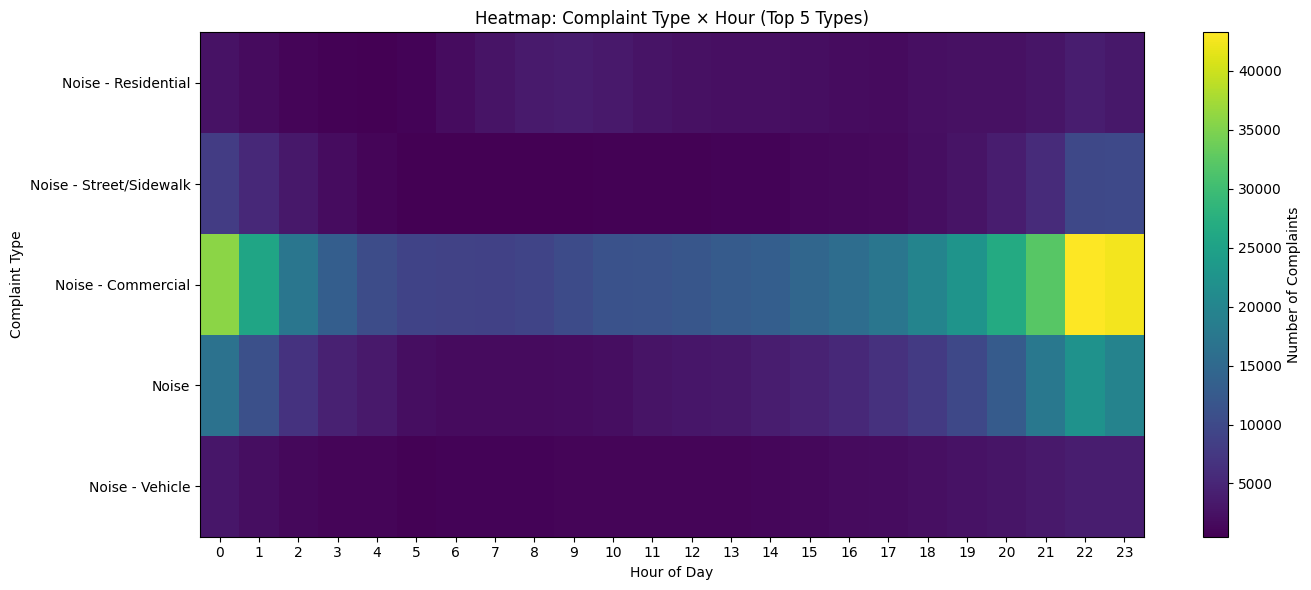

In [62]:
plt.figure(figsize=(14, 6))
plt.imshow(pivot_hour_type, aspect='auto', cmap='viridis')
plt.title("Heatmap: Complaint Type × Hour (Top 5 Types)")
plt.xlabel("Hour of Day")
plt.ylabel("Complaint Type")
plt.colorbar(label="Number of Complaints")
plt.xticks(range(24))
plt.yticks(range(len(top_types)), top_types)
plt.tight_layout()
plt.savefig("../figures/figure04.png", dpi=300, bbox_inches="tight")
plt.show()

In [19]:
#dayofweek × Complaint Type 
pivot_dow_type = subset.pivot_table(
    index="Complaint Type",
    columns="dayofweek",
    values="Created Date",
    aggfunc="count",
    fill_value=0
)

pivot_dow_type

dayofweek,0,1,2,3,4,5,6
Complaint Type,,,,,,,
Noise,8286,8807,8676,8510,7595,7613,6032
Noise - Commercial,6099,5150,5565,6951,9981,16140,14740
Noise - Residential,57961,52790,47631,47758,58454,86138,93251
Noise - Street/Sidewalk,19515,16478,15807,16639,25117,39072,40241
Noise - Vehicle,5240,4881,4712,5287,6345,7384,8314


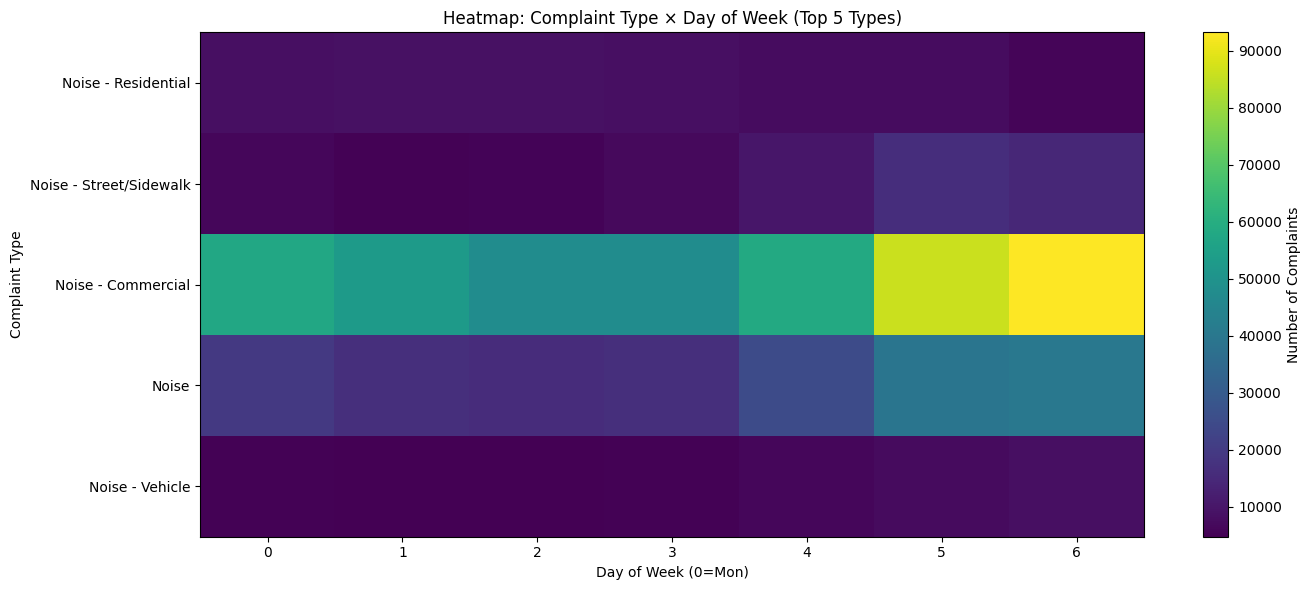

In [20]:
plt.figure(figsize=(14, 6))
plt.imshow(pivot_dow_type, aspect='auto', cmap='viridis')
plt.title("Heatmap: Complaint Type × Day of Week (Top 5 Types)")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Complaint Type")
plt.colorbar(label="Number of Complaints")
plt.xticks(range(7))
plt.yticks(range(len(top_types)), top_types)
plt.tight_layout()
plt.show()

In [21]:
## Calculate response_hours + filter reasonable response times + define closed_24h
import numpy as np

#Calculate response time (hours)
noise_df["response_hours"] = (
    noise_df["Closed Date"] - noise_df["Created Date"]
).dt.total_seconds() / 3600

# 2. Only keep records with a Closed Date and a reasonable response time.
# Remove records without a close date, negative values, and extremely unreasonable values (over 7 days).
mask_valid = (
    noise_df["response_hours"].notna()
    & (noise_df["response_hours"] >= 0)
    & (noise_df["response_hours"] <= 24 * 7)
)

model_df = noise_df[mask_valid].copy()

# 3.Define label: Closed within 24 hours?
model_df["closed_24h"] = (model_df["response_hours"] <= 24).astype(int)

model_df[["response_hours", "closed_24h"]].head()

,response_hours,closed_24h
11,0.061667,1
49,0.283333,1
53,0.145278,1
54,0.012778,1
57,0.325278,1


# **Block 2 — Response Efficiency & Institutional Patterns**
This section evaluates how quickly different agencies respond to noise complaints.  
We analyze:
- Response time (in hours)
- 24-hour closure indicator
- Agency-level efficiency
- Temporal efficiency (hour-of-day, day-of-week)
- Agency × Hour interaction
- Complaint Type differences
- Missingness patterns

These analyses support *RQ2: What factors influence whether a complaint is closed within 24 hours?*


In [22]:

#  Agency-level response efficiency

agency_stats = (
    model_df
    .groupby("Agency")
    .agg(
        n_cases=("closed_24h", "size"),
        closed_24h_rate=("closed_24h", "mean"),
        median_response_hours=("response_hours", "median"),
        mean_response_hours=("response_hours", "mean"),
    )
    .sort_values("closed_24h_rate", ascending=False)
)

agency_stats.round(3)

,n_cases,closed_24h_rate,median_response_hours,mean_response_hours
Agency,,,,
NYPD,735900,0.987,1.067,2.865
DEP,44402,0.320,45.542,59.287


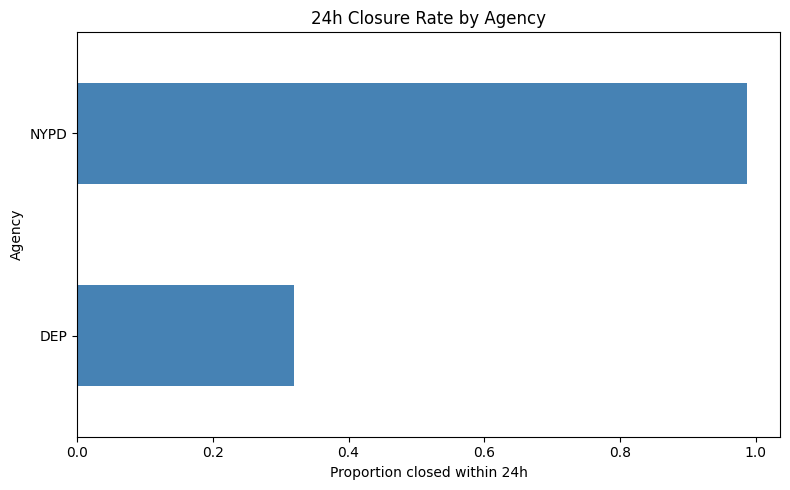

In [78]:
plt.figure(figsize=(8, 5))
agency_stats["closed_24h_rate"].sort_values().plot(kind="barh", color="steelblue")
plt.title("24h Closure Rate by Agency")
plt.xlabel("Proportion closed within 24h")
plt.ylabel("Agency")
plt.tight_layout()
plt.savefig("../figures/figure08.png", dpi=300, bbox_inches="tight")
plt.show()

In [82]:
agency_hour[agency_hour["Agency"] == "NYPD"]


,Agency,hour,closed_24h
24,NYPD,0,0.992973
25,NYPD,1,0.991425
26,NYPD,2,0.986065
27,NYPD,3,0.983078
28,NYPD,4,0.979940
29,NYPD,5,0.976510
30,NYPD,6,0.974517
31,NYPD,7,0.973588
32,NYPD,8,0.975629
33,NYPD,9,0.977459


In [81]:
agency_hour[agency_hour["Agency"] == "DEP"]

,Agency,hour,closed_24h
0,DEP,0,0.451514
1,DEP,1,0.465644
2,DEP,2,0.433333
3,DEP,3,0.405024
4,DEP,4,0.435272
5,DEP,5,0.384848
6,DEP,6,0.226706
7,DEP,7,0.235264
8,DEP,8,0.214590
9,DEP,9,0.231485


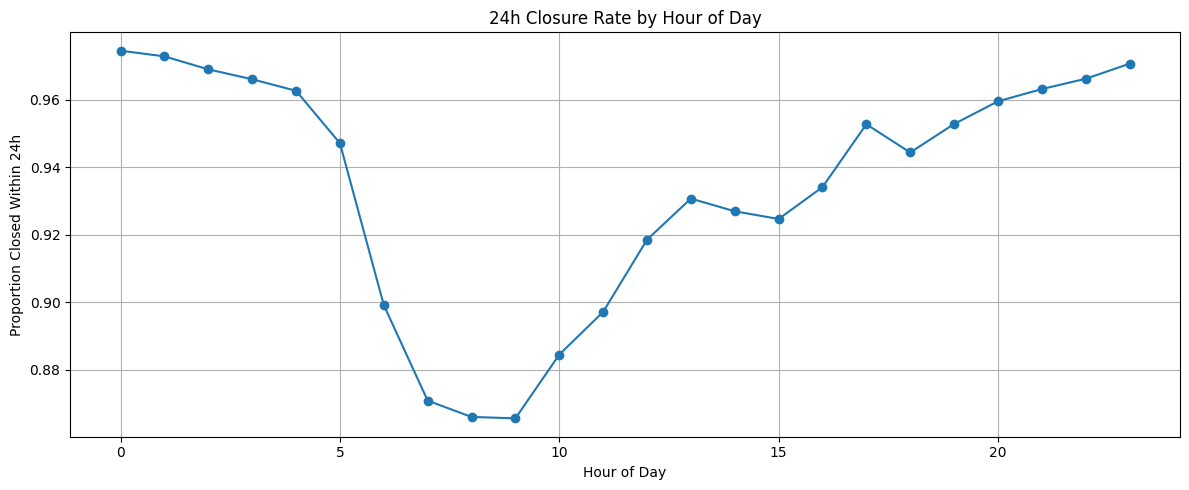

In [76]:
hourly = (
    model_df
    .groupby("hour")["closed_24h"]
    .mean()
)

plt.figure(figsize=(12, 5))
hourly.plot(marker='o')
plt.title("24h Closure Rate by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Proportion Closed Within 24h")
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/figure06.png", dpi=300, bbox_inches="tight")
plt.show()

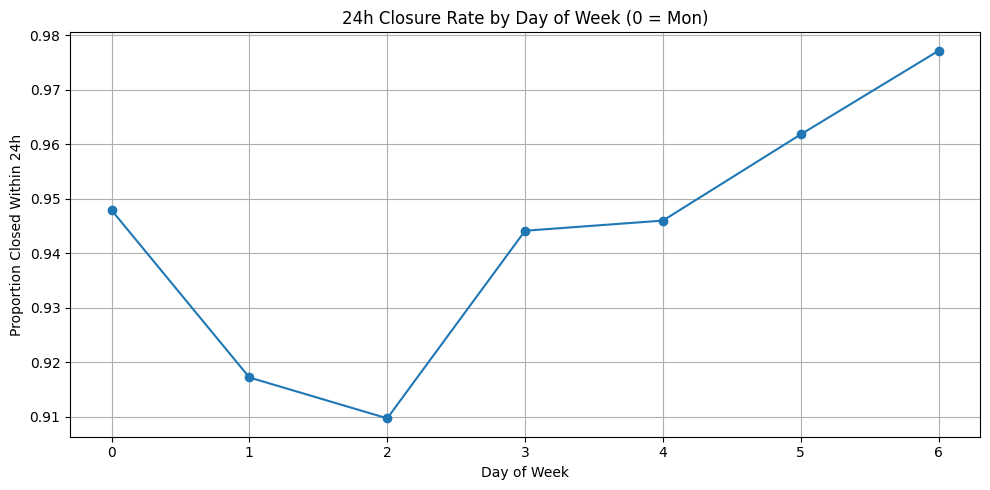

In [77]:
dow = (
    model_df
    .groupby("dayofweek")["closed_24h"]
    .mean()
)

plt.figure(figsize=(10, 5))
dow.plot(marker='o')
plt.title("24h Closure Rate by Day of Week (0 = Mon)")
plt.xlabel("Day of Week")
plt.ylabel("Proportion Closed Within 24h")
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/figure07.png", dpi=300, bbox_inches="tight")
plt.show()

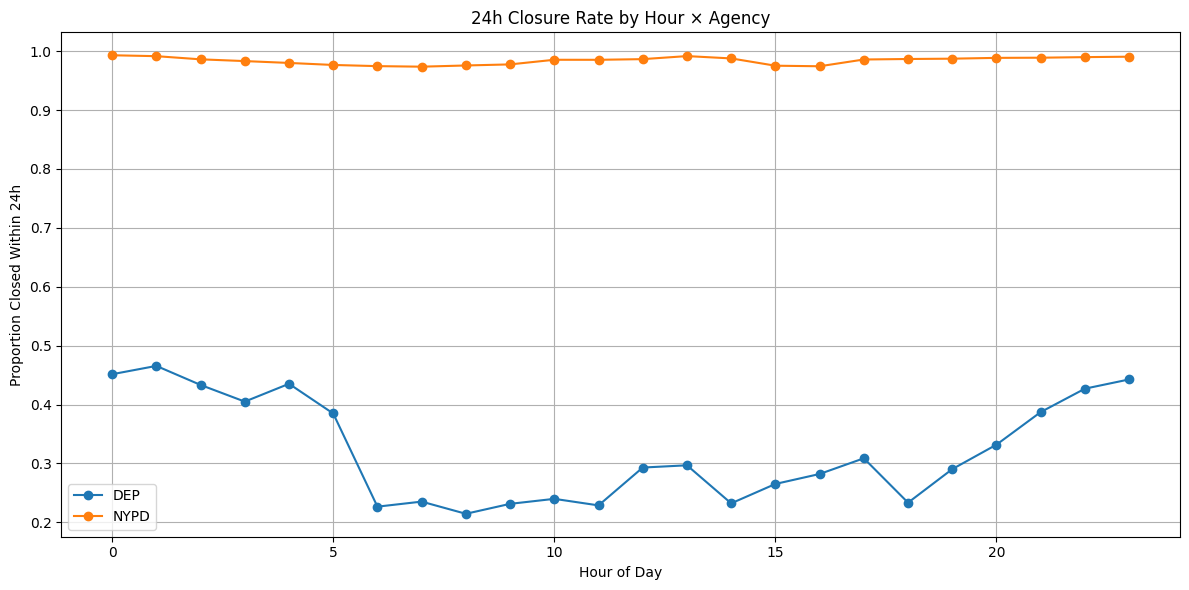

In [26]:
agency_hour = (
    model_df
    .groupby(["Agency", "hour"])["closed_24h"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))

for agency in agency_hour["Agency"].unique():
    subset = agency_hour[agency_hour["Agency"] == agency]
    plt.plot(subset["hour"], subset["closed_24h"], marker='o', label=agency)

plt.title("24h Closure Rate by Hour × Agency")
plt.xlabel("Hour of Day")
plt.ylabel("Proportion Closed Within 24h")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

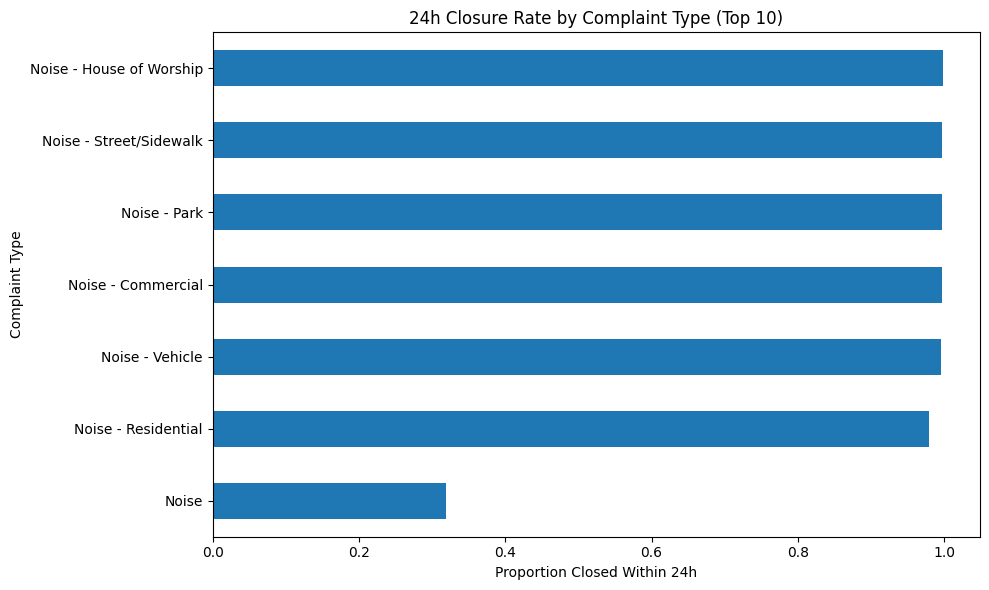

In [71]:
top_ct = noise_df["Complaint Type"].value_counts().head(10).index

type_stats = (
    model_df[model_df["Complaint Type"].isin(top_ct)]
    .groupby("Complaint Type")["closed_24h"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(10, 6))
type_stats.plot(kind="barh")
plt.title("24h Closure Rate by Complaint Type (Top 10)")
plt.xlabel("Proportion Closed Within 24h")
plt.tight_layout()
plt.savefig("../figures/figure05.png", dpi=300, bbox_inches="tight")
plt.show()

In [63]:
model_df["closed_24h"].mean()

np.float64(0.9486775633024137)

In [64]:
model_df["response_hours"].median()

np.float64(1.1772222222222222)

In [66]:
model_df["closed_24h"].mean()

np.float64(0.9486775633024137)

In [67]:
model_df["closed_48h"] = (model_df["response_hours"] <= 48).astype(int)
model_df["closed_48h"].mean()

np.float64(0.9721620603304875)

In [74]:
model_df["response_hours"].quantile([0.25, 0.5, 0.75])

0.25    0.501944
0.50    1.177222
0.75    3.386944
Name: response_hours, dtype: float64

# **Block 3 — Predictive Modeling & Model Interpretation**
This section builds machine learning models to predict whether a noise complaint will be closed within 24 hours.  
Models include:
- Logistic Regression (baseline)
- Random Forest (primary model)

We compare performance using:
- ROC-AUC  
- PR-AUC  
- Classification report

Then we interpret the Random Forest using:
- Feature importances
- Time-based robustness checks
- Partial Dependence Plots (PDPs) for:
  - Time features (hour, weekday)
  - Agency dummies (e.g., DEP vs NYPD)
  - Borough dummies (e.g., Manhattan vs Bronx)

These results deepen understanding of governance mechanisms and support *RQ2 & RQ3*.

In [28]:
# ============================================================
# Block 3 – Predictive Modeling (24h closure prediction)
# ============================================================

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    classification_report
)
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [29]:
# 1. Make sure is_weekend is 0/1
model_df["is_weekend"] = model_df["is_weekend"].astype(int)

# 2. Define feature columns and target column.
numeric_features = ["hour", "dayofweek", "month", "is_weekend"]
categorical_features = ["Borough", "Complaint Type", "Descriptor", "Location Type", "Agency"]
target_col = "closed_24h"

# Convert numerical features to float to avoid PDP's FutureWarning.
num_cols_to_float = ["hour", "dayofweek", "month", "is_weekend"]
model_df[num_cols_to_float] = model_df[num_cols_to_float].astype(float)

X = model_df[numeric_features + categorical_features]
y = model_df[target_col]

# 3. Randomly split into training/test sets (for main evaluation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

len(X_train), len(X_test), y.mean()

(624241, 156061, np.float64(0.9486775633024137))

In [30]:
# 4.Preprocessing: Numerical features pass through directly, categorical features are One-Hot encoded.
numeric_transformer = "passthrough"
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# 5. General evaluation function: calculates ROC-AUC, PR-AUC, and classification report
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    
    roc = roc_auc_score(y_test, y_proba)
    pr = average_precision_score(y_test, y_proba)
    
    print(f"=== {name} ===")
    print("ROC-AUC:", round(roc, 4))
    print("PR-AUC :", round(pr, 4))
    print("\nClassification report:")
    print(classification_report(y_test, y_pred))
    
    return {
        "model": name,
        "roc_auc": roc,
        "pr_auc": pr
    }
print("preprocess and evaluate_model are defined.")

preprocess and evaluate_model are defined.


In [31]:
# 6. Baseline Model: Logistic Regression
log_reg = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("clf", LogisticRegression(
            max_iter=1000,
            n_jobs=-1
        ))
    ]
)

# 7. Main model: Random Forest
rf_clf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("clf", RandomForestClassifier(
            n_estimators=200,
            max_depth=15,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

# 8. Evaluate the two models on a random train/test split.
results = []
results.append(evaluate_model("Logistic Regression", log_reg, X_train, y_train, X_test, y_test))
results.append(evaluate_model("Random Forest", rf_clf, X_train, y_train, X_test, y_test))

results_df = pd.DataFrame(results)
results_df

=== Logistic Regression ===
ROC-AUC: 0.9485
PR-AUC : 0.9957

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70      8009
           1       0.98      0.99      0.98    148052

    accuracy                           0.97    156061
   macro avg       0.85      0.84      0.84    156061
weighted avg       0.97      0.97      0.97    156061

=== Random Forest ===
ROC-AUC: 0.9781
PR-AUC : 0.9985

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76      8009
           1       0.98      0.99      0.99    148052

    accuracy                           0.98    156061
   macro avg       0.89      0.85      0.87    156061
weighted avg       0.98      0.98      0.98    156061



,model,roc_auc,pr_auc
0,Logistic Regression,0.948463,0.995734
1,Random Forest,0.978080,0.998481


In [32]:
# 9. Refit the Random Forest model on a random train/test split's training set for explanation (feature importance & PDP).
rf_clf.fit(X_train, y_train)

# 10. Obtained the internal RF model and OneHotEncoder.
rf_inner = rf_clf.named_steps["clf"]
ohe = rf_clf.named_steps["preprocess"].named_transformers_["cat"]

ohe_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(ohe_feature_names)

# 11. Calculate feature_importances_ and take the top 20.
importances = rf_inner.feature_importances_
idx = np.argsort(importances)[::-1][:20]

top_features = [(all_feature_names[i], importances[i]) for i in idx]
top_features_df = pd.DataFrame(top_features, columns=["feature", "importance"])
top_features_df

,feature,importance
0,Agency_DEP,0.165459
1,Agency_NYPD,0.161779
2,Location Type_nan,0.159585
3,Complaint Type_Noise,0.141659
4,dayofweek,0.073975
5,hour,0.068761
6,month,0.052472
7,"Descriptor_Noise, Barking Dog (NR5)",0.034180
8,Descriptor_Noise: Construction Before/After Ho...,0.032692
9,Descriptor_Noise: Construction Equipment (NC1),0.019250


In [33]:
# 12. Time split based on Created Date: the first half for training, the second half for testing
min_date = model_df["Created Date"].min()
max_date = model_df["Created Date"].max()
print("Min date:", min_date)
print("Max date:", max_date)

mid_date = min_date + (max_date - min_date) / 2
mid_date

train_mask = model_df["Created Date"] < mid_date
test_mask  = model_df["Created Date"] >= mid_date

X_time_train = model_df.loc[train_mask, numeric_features + categorical_features]
y_time_train = model_df.loc[train_mask, target_col]

X_time_test  = model_df.loc[test_mask, numeric_features + categorical_features]
y_time_test  = model_df.loc[test_mask, target_col]

len(X_time_train), len(X_time_test)

Min date: 2024-11-23 10:09:46
Max date: 2025-11-22 02:01:05


(360715, 419587)

In [34]:
# Re-evaluate Logistic & RF on time slicing.
results_time = []
results_time.append(evaluate_model("Logistic (time-split)", log_reg, X_time_train, y_time_train, X_time_test, y_time_test))
results_time.append(evaluate_model("RandomForest (time-split)", rf_clf, X_time_train, y_time_train, X_time_test, y_time_test))

results_time_df = pd.DataFrame(results_time)
results_time_df

=== Logistic (time-split) ===
ROC-AUC: 0.9635
PR-AUC : 0.9974

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     16403
           1       0.99      0.99      0.99    403184

    accuracy                           0.98    419587
   macro avg       0.85      0.90      0.87    419587
weighted avg       0.98      0.98      0.98    419587

=== RandomForest (time-split) ===
ROC-AUC: 0.9681
PR-AUC : 0.9978

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79     16403
           1       0.99      0.99      0.99    403184

    accuracy                           0.98    419587
   macro avg       0.88      0.91      0.89    419587
weighted avg       0.98      0.98      0.98    419587



,model,roc_auc,pr_auc
0,Logistic (time-split),0.96354,0.997436
1,RandomForest (time-split),0.96813,0.997772


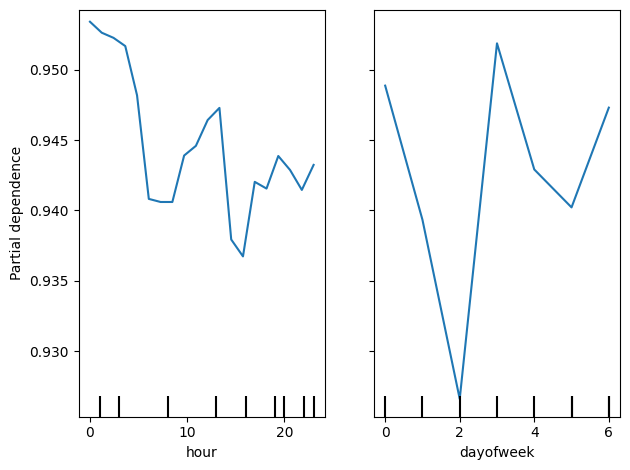

In [84]:
# 14. Plot PDP (Partial Dependence Plot) for continuous time features (hour, dayofweek)
features_to_plot = ["hour", "dayofweek"]
feature_indices = [all_feature_names.index(f) for f in features_to_plot]

PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_train,
    features=feature_indices,
    feature_names=all_feature_names,
    kind="average",
    grid_resolution=20
)
plt.tight_layout()
plt.savefig("../figures/figure09.png", dpi=300, bbox_inches="tight")
plt.show()

In [36]:
# === Before categorical PDPs: get inner RF + transformed X (dense) ===

rf_inner = rf_clf.named_steps["clf"]
preprocess = rf_clf.named_steps["preprocess"]

X_train_trans = preprocess.transform(X_train)

# If it's a sparse matrix, convert it to a dense ndarray to avoid the csr_matrix error reported by PDP + matplotlib.
from scipy.sparse import issparse
if issparse(X_train_trans):
    X_train_trans = X_train_trans.toarray()

X_train_trans.shape, len(all_feature_names)

((624241, 47), 47)

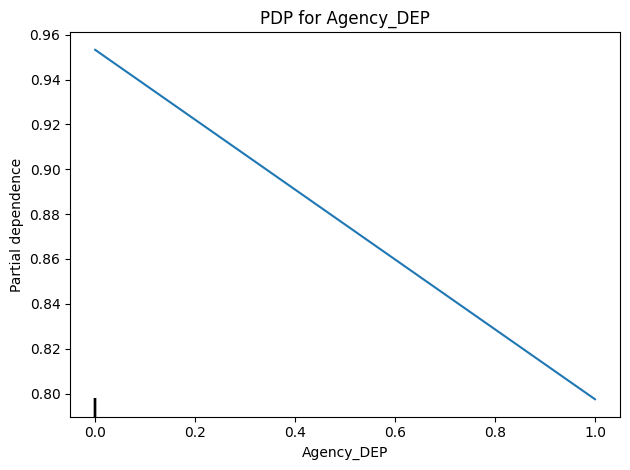

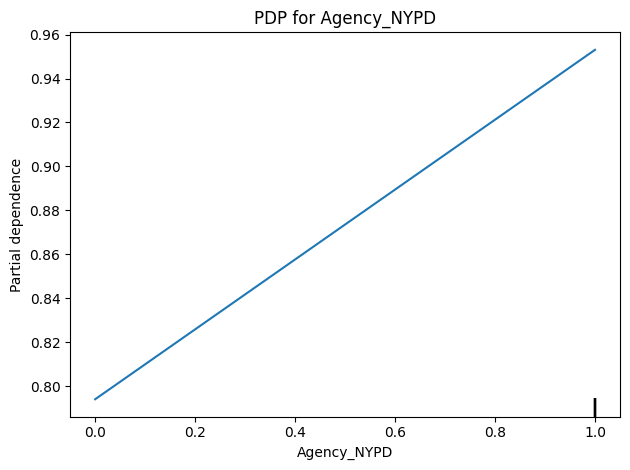

In [37]:
# 15. PDP for Agency dummies: focus on NYPD and DEP

# First, confirm which Agency dummy entries are in all_feature_names.
agency_dummy_names = [name for name in all_feature_names if name.startswith("Agency_")]
agency_dummy_names

from sklearn.inspection import PartialDependenceDisplay

#  DEP & NYPD
target_agencies = ["Agency_DEP", "Agency_NYPD"]
target_indices = [
    all_feature_names.index(name)
    for name in target_agencies
    if name in all_feature_names
]

for idx in target_indices:
    fname = all_feature_names[idx]
    disp = PartialDependenceDisplay.from_estimator(
        rf_inner,
        X_train_trans,
        features=[idx],              
        feature_names=all_feature_names,
        kind="average",
        grid_resolution=2            
    )
    plt.title(f"PDP for {fname}")
    plt.tight_layout()
    plt.show()

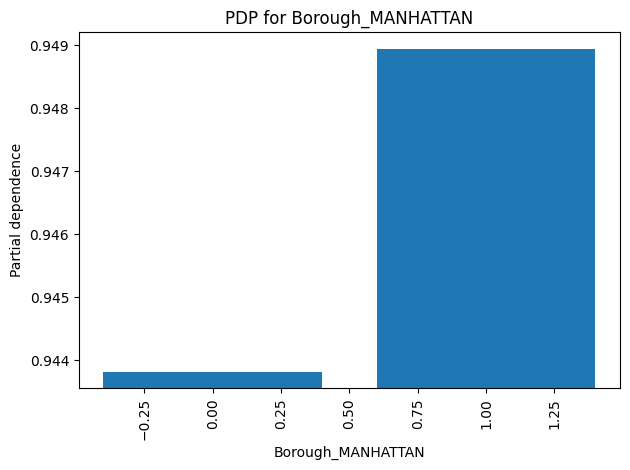

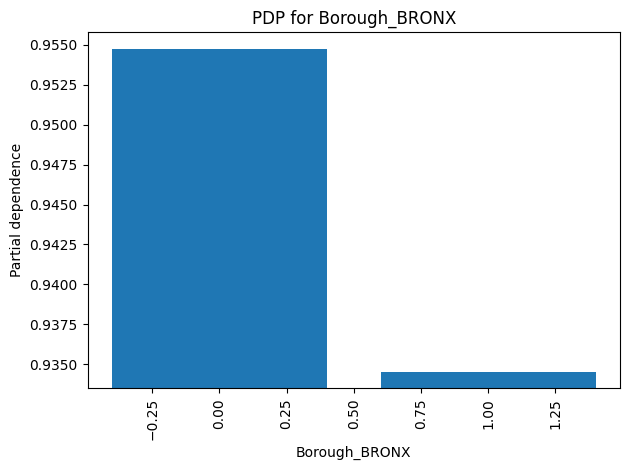

In [38]:
# 16. PDP for Borough dummies

#“Conditional on complaint type and time of day, the predicted probability of closing a complaint within 24 hours is higher in Manhattan than in Bronx, suggesting spatial disparities in service delivery.”

target_boroughs = ["Borough_MANHATTAN", "Borough_BRONX"]
target_indices = [
    all_feature_names.index(name)
    for name in target_boroughs
    if name in all_feature_names
]

for idx in target_indices:
    fname = all_feature_names[idx]
    disp = PartialDependenceDisplay.from_estimator(
        rf_inner,
        X_train_trans,
        features=[idx],
        feature_names=all_feature_names,
        kind="average",
        grid_resolution=2,
        categorical_features=[idx],
    )
    plt.title(f"PDP for {fname}")
    plt.tight_layout()
    plt.show()

# **Block 4 — Equity & Bias Analysis**
This section investigates spatial, institutional, and data-driven disparities in noise complaint responses.  
We examine:
- Borough-level closure rate disparities  
- Complaint Type disparities  
- Borough × Complaint Type intersections  
- Agency × Borough interactions  
- Missing Location Type and its relationship to slower response  

These analyses address *RQ3: Are there inequities or systemic biases in NYC’s noise complaint response system?*

In [39]:
#  Borough disparities

borough_stats = (
    model_df
    .groupby("Borough")
    .agg(
        n_cases=("closed_24h", "size"),
        closed_24h_rate=("closed_24h", "mean"),
        median_response_hours=("response_hours", "median")
    )
    .sort_values("closed_24h_rate")
)

borough_stats.round(3)

,n_cases,closed_24h_rate,median_response_hours
Borough,,,
STATEN ISLAND,16744,0.928,1.088
MANHATTAN,169127,0.930,0.954
Unspecified,43,0.930,2.744
BROOKLYN,191551,0.952,0.939
QUEENS,142434,0.955,1.108
BRONX,260403,0.957,1.852


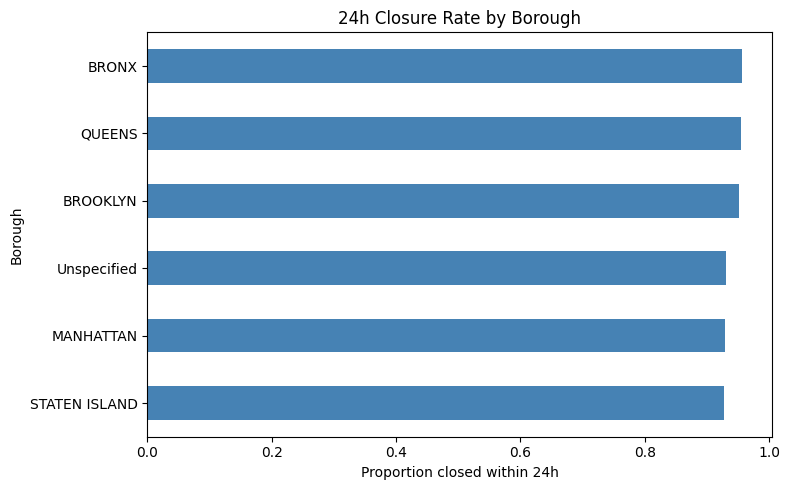

In [40]:
plt.figure(figsize=(8, 5))
borough_stats["closed_24h_rate"].plot(kind="barh", color="steelblue")
plt.title("24h Closure Rate by Borough")
plt.xlabel("Proportion closed within 24h")
plt.ylabel("Borough")
plt.tight_layout()
plt.show()

In [41]:
# Only the top 10 most frequent noise categories are analyzed.
top10_types = noise_df["Complaint Type"].value_counts().head(10).index

type_stats = (
    model_df[model_df["Complaint Type"].isin(top10_types)]
    .groupby("Complaint Type")["closed_24h"]
    .mean()
    .sort_values()
)

type_stats

Complaint Type
Noise                       0.319648
Noise - Residential         0.979809
Noise - Vehicle             0.995540
Noise - Commercial          0.996685
Noise - Park                0.996860
Noise - Street/Sidewalk     0.997430
Noise - House of Worship    0.998958
Name: closed_24h, dtype: float64

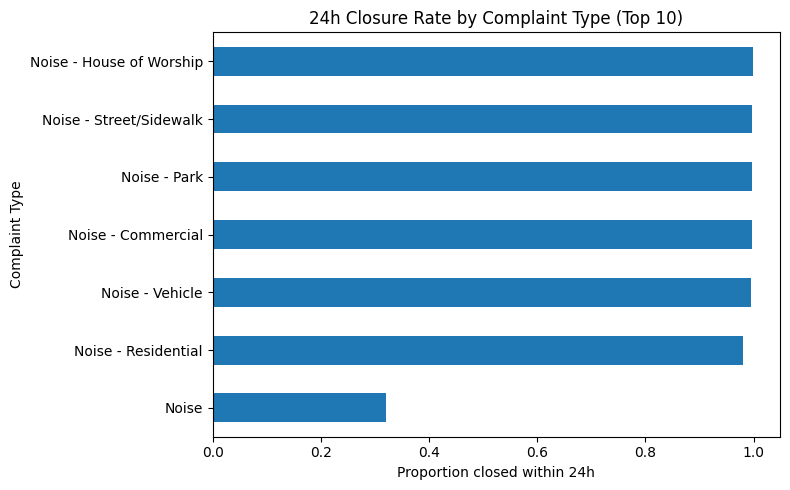

In [42]:
plt.figure(figsize=(8, 5))
type_stats.plot(kind="barh")
plt.title("24h Closure Rate by Complaint Type (Top 10)")
plt.xlabel("Proportion closed within 24h")
plt.tight_layout()
plt.show()

In [43]:
# Borough × Complaint Type × 24h closure
intersection_bt = (
    model_df
    .groupby(["Borough", "Complaint Type"])["closed_24h"]
    .mean()
    .unstack()
    .fillna(0)
)

intersection_bt.head()

Complaint Type,Noise,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Residential,Noise - Street/Sidewalk,Noise - Vehicle
Borough,,,,,,,
BRONX,0.261435,0.983848,0.985507,0.992192,0.959456,0.995747,0.991763
BROOKLYN,0.300821,0.998618,1.000000,0.995138,0.996342,0.998797,0.997087
MANHATTAN,0.300706,0.999436,1.000000,1.000000,0.998620,0.999468,0.999160
QUEENS,0.414163,0.995633,0.999491,0.996875,0.990573,0.994484,0.993247
STATEN ISLAND,0.267674,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
intersection_bt["Noise - Residential"].sort_values()

Borough
Unspecified      0.958333
BRONX            0.959456
QUEENS           0.990573
BROOKLYN         0.996342
MANHATTAN        0.998620
STATEN ISLAND    1.000000
Name: Noise - Residential, dtype: float64

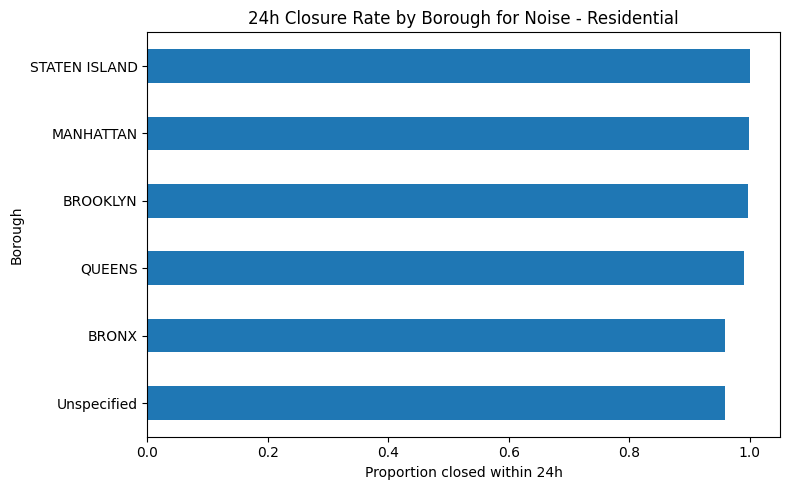

In [44]:
target_type = "Noise - Residential"
plt.figure(figsize=(8,5))
intersection_bt[target_type].sort_values().plot(kind="barh")
plt.title(f"24h Closure Rate by Borough for {target_type}")
plt.xlabel("Proportion closed within 24h")
plt.tight_layout()
plt.show()

In [45]:
agency_boro = (
    model_df
    .groupby(["Agency", "Borough"])["closed_24h"]
    .mean()
    .unstack()
    .fillna(0)
)

agency_boro

Borough,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,Unspecified
Agency,,,,,,
DEP,0.261435,0.300821,0.300706,0.414163,0.267674,0.000000
NYPD,0.968015,0.997223,0.999095,0.992458,1.000000,0.930233


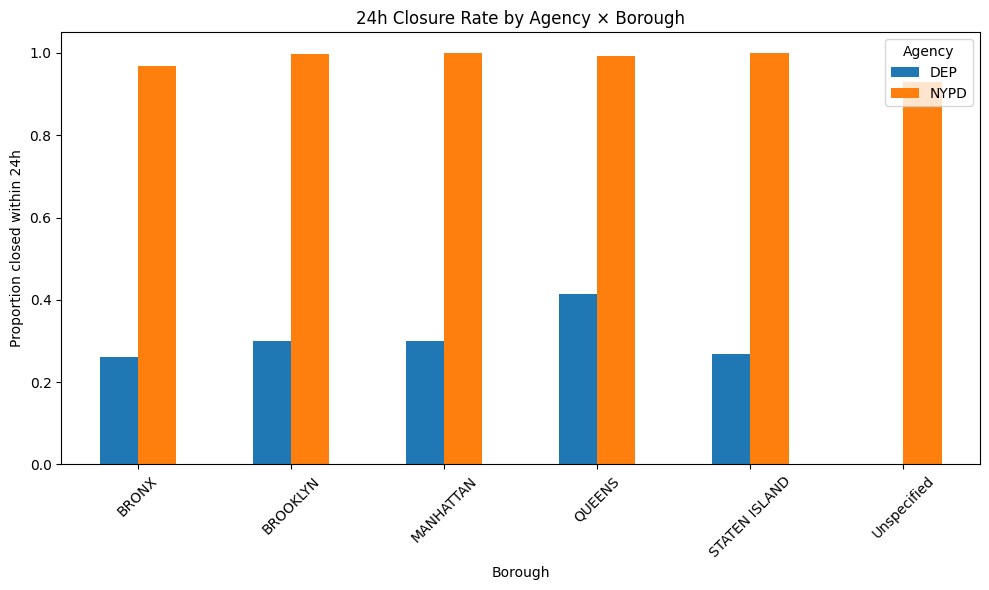

In [46]:
agency_boro.T.plot(kind="bar", figsize=(10, 6))
plt.title("24h Closure Rate by Agency × Borough")
plt.ylabel("Proportion closed within 24h")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.legend(title="Agency")
plt.tight_layout()
plt.show()
plt.savefig("../figs/figure01_monthly.png", dpi=300, bbox_inches="tight")

In [47]:
model_df["loc_missing"] = model_df["Location Type"].isna().astype(int)

missing_stats = (
    model_df
    .groupby("loc_missing")["closed_24h"]
    .mean()
)

missing_stats

loc_missing
0    0.986634
1    0.320001
Name: closed_24h, dtype: float64

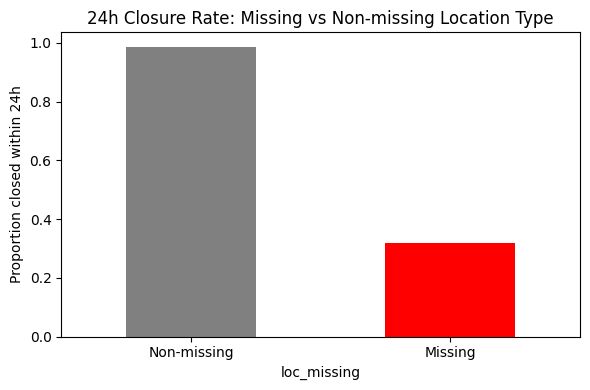

In [48]:
plt.figure(figsize=(6,4))
missing_stats.plot(kind="bar", color=["gray", "red"])
plt.title("24h Closure Rate: Missing vs Non-missing Location Type")
plt.xticks([0,1], ["Non-missing", "Missing"], rotation=0)
plt.ylabel("Proportion closed within 24h")
plt.tight_layout()
plt.show()
plt.savefig("../figs/figure01_monthly.png", dpi=300, bbox_inches="tight")

In [49]:
missing_by_borough = (
    model_df
    .groupby("Borough")["loc_missing"]
    .mean()
    .sort_values()
)

missing_by_borough

Borough
BRONX            0.015952
QUEENS           0.065434
BROOKLYN         0.065523
STATEN ISLAND    0.098841
MANHATTAN        0.098884
Unspecified      0.558140
Name: loc_missing, dtype: float64

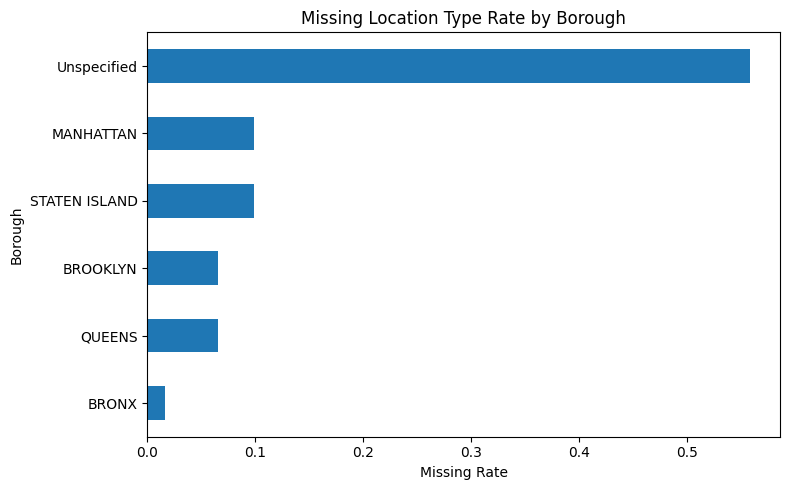

In [56]:
plt.figure(figsize=(8,5))
missing_by_borough.plot(kind="barh")
plt.title("Missing Location Type Rate by Borough")
plt.xlabel("Missing Rate")
plt.tight_layout()

plt.show()


In [83]:
model_df["loc_missing"].mean()

np.float64(0.05693692954779047)

In [65]:
!jupyter nbconvert --to script nyc_noise_analysis_full.ipynb

[NbConvertApp] Converting notebook nyc_noise_analysis_full.ipynb to script
[NbConvertApp] Writing 23110 bytes to nyc_noise_analysis_full.py
